In [1]:
import netCDF4 as nc
# from numpy import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio # deprecated
import pandas as pd
import glob
from scipy.stats import *
from scipy.optimize import curve_fit
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import seaborn as sns
import json

from area_mean import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *
from calc_LRM_metric import *
from calc_LRMobs_metric import *
from fitLRMobs import *
from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *
from Aploting_Sep11 import *
from useful_func_cy import *

In [2]:
# model list

exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# cmip5 + cmip6 (50):

deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  # current # 30 + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  # current # 30 + 20 = 50

deck3 = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
         FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
          GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48]
deck3_nas = ['CanESM5', 'E3SM10', 'CESM2FV2', 'CESM2', 'CNRMCM61', 'CESM2WACCMFV2', 'CNRMESM21', 'NESM3', 'IPSLCM6ALR', 'CESM2WACCM', 'MIROCESM', 'TaiESM1', 'ECEarth3Veg', 'CNRMCM61HR', 'ECEarth3', 
         'FGOALSs2', 'IPSLCM5ALR', 'CSIRO_Mk360', 'BNUESM', 'GFDLCM3', 'GFDLCM4', 'SAM0', 'CanESM2', 'MPIESMLR', 'CMCCCM2SR5', 'MPIESMMR', 'FGOALSg2', 'BCCESM1', 'CNRMCM5', 'AWICM11MR', 'MRIESM20', 
          'GISSE21H', 'MPIESM12LR', 'CCSM4', 'NorESM1M', 'FGOALSg3', 'bcccsm11', 'MIROC5', 'GISSE21G', 'MIROCES2L', 'MRICGCM3', 'MIROC6', 'NorESM2MM', 'GFDLESM2M', 'GFDLESM2G', 'GISSE22G', 'GISSE21H', 'CAMSCSM1', 'GISSE2R', 'INM_CM48']


In [3]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set area-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge:  36
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9

#.. current model #: 18 + 12 (except: '19')
path_data = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'

### Fig 1:

Relationships between the LWP response and the extratropical SW_{FB} and ECS.

#### Subplot (a):
Extratropical SW_{FB} and {\Delta LWP}/ {\Delta GMT}

##### Read GCM LWP data:

In [4]:
## Read 50 GCMs raw resolution and 5X5 bin data:

path2 = '/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/'
output_ARRAY_5x5 = {}   # storage output file

# Raw data
output_dict0_PI = {}
output_dict0_abr = {}

# Metric raw data in specific units:
output_PI_bin_var = {}
output_abr_bin_var = {}
shape_mon_pi = {}
shape_mon_abr = {}

Tr_sst =  0.0

for i in range(len(deck3)):
    # print("i", i)
    folder_5x5 = glob.glob(path2 + deck3[i]['modn'] + '_raw_5X5bin_Nov11th_'+'_dats.npz')
    print(len(folder_5x5))

    if len(folder_5x5) == 4:
        if (len(folder_5x5[0]) < len(folder_5x5[1])) & (len(folder_5x5[0]) < len(folder_5x5[2])) & (len(folder_5x5[0]) < len(folder_5x5[3])):
            folder_bes_5x5 = folder_5x5[0]
        elif (len(folder_5x5[1]) < len(folder_5x5[0])) & (len(folder_5x5[1]) < len(folder_5x5[2])) & (len(folder_5x5[1]) < len(folder_5x5[3])):
            folder_bes_5x5 = folder_5x5[1]
        elif (len(folder_5x5[2]) < len(folder_5x5[0])) & (len(folder_5x5[2]) < len(folder_5x5[1])) & (len(folder_5x5[2]) < len(folder_5x5[3])):
            folder_bes_5x5 = folder_5x5[2]
        else:
            folder_bes_5x5 = folder_5x5[3]
        print(folder_bes_5x5)

    elif len(folder_5x5) == 3:
        if (len(folder_5x5[1]) <  len(folder_5x5[0])) & (len(folder_5x5[1]) <  len(folder_5x5[2])):
            folder_bes_5x5 = folder_5x5[1]
        elif (len(folder_5x5[0]) <  len(folder_5x5[1])) & (len(folder_5x5[0]) <  len(folder_5x5[2])):
            folder_bes_5x5 = folder_5x5[0]
        else:
            folder_bes_5x5 = folder_5x5[2]
        print(folder_bes_5x5)

    elif len(folder_5x5) == 2:
        if len(folder_5x5[1]) <  len(folder_5x5[0]):
            folder_bes_5x5 = folder_5x5[1]
        else:
            folder_bes_5x5 = folder_5x5[0]
        print(folder_bes_5x5)

    else:
        output_ARRAY_5x5[deck3_nas[i]] = load(folder_5x5[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_5x5[0])

    # output_ARRAY[deck3_nas[i]] =  load(folder_bes_5x5, allow_pickle=True)  #+'_'+str(Tr_sst)

    # output_ARRAY[deck3_nas[i]] = load(folder_5x5[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    # output_intermedia[deck3_nas[i]] = output_ARRAY_5x5[deck3_nas[i]]['rawdata_dict']

    output_dict0_PI[deck3_nas[i]] = output_ARRAY_5x5[deck3_nas[i]]['dict0_PI_var']
    output_dict0_abr[deck3_nas[i]] = output_ARRAY_5x5[deck3_nas[i]]['dict0_abr_var']

    # Monthly data
    output_PI_bin_var[deck3_nas[i]] = output_ARRAY_5x5[deck3_nas[i]]['dict1_PI_bin_var']
    output_abr_bin_var[deck3_nas[i]] = output_ARRAY_5x5[deck3_nas[i]]['dict1_abr_bin_var']
    # Annually data

    # Flattened Metric monthly mean bin data
    # shape_mon_pi[deck3_nas[i]] = output_dict0_PI[deck3_nas[i]][()]['shape_mon_PI_3']
    # shape_mon_abr[deck3_nas[i]] = output_dict0_abr[deck3_nas[i]][()]['shape_mon_abr_3']

print('Down read 5 x 5.')


1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CanESM5_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/E3SM-1-0_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CESM2-FV2_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CESM2_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CNRM-CM6-1_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CESM2-WACCM-FV2_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CNRM-ESM2-1_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/NESM3_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/IPSL-CM6A-LR_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CESM2-WACCM_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/MIROC-ESM_raw_5X5bin_Nov

#### Processing:

In [5]:
# calc the mean state LWP and delta LWP and delta P-E in global 5 x 5 bin resolutions;

delta_LWP_dTg_ALL_5X5 = full((len(deck3), 36, 72), 0.0)  # GLOBAL lwp changes
mean_LWP_ALL_5X5 = full((len(deck3), 36, 72), 0.0)  # GLOBAL Mean State lwp
delta_P_E_dTg_ALL_5X5 = full((len(deck3), 36, 72), 0.0)  # Global moisture convergence changes

# global mean surface air Temperature (GMT):

delta_gmt = full(len(deck3), 0.000)

f20yr_index = 121*12
l20yr_index = 140*123

for i in range(len(deck3_nas)):

    delta_gmt[i] = np.nanmean(area_mean(output_abr_bin_var[deck3_nas[i]][()]['gmt_mon_bin'][f20yr_index:l20yr_index, :,:], s_range, x_range)) - np.nanmean(area_mean(output_PI_bin_var[deck3_nas[i]][()]['gmt_mon_bin'], s_range, x_range)) 

# \Delta LWP scaled by gmt; mean State LWP; and \Delta moisture convergence scaled by gmt:
for i in range(len(deck3_nas)):
    delta_LWP_dTg_ALL_5X5[i] = (np.nanmean(output_abr_bin_var[deck3_nas[i]][()]['LWP_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0) - np.nanmean(output_PI_bin_var[deck3_nas[i]][()]['LWP_mon_bin'], axis = 0)) / delta_gmt[i]

    mean_LWP_ALL_5X5[i] = deepcopy(np.nanmean(output_PI_bin_var[deck3_nas[i]][()]['LWP_mon_bin'], axis = 0))

    delta_P_E_dTg_ALL_5X5[i] = (np.nanmean(output_abr_bin_var[deck3_nas[i]][()]['p_e_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0) - np.nanmean(output_PI_bin_var[deck3_nas[i]][()]['p_e_mon_bin'], axis = 0)) / delta_gmt[i]


##### Read SW_{FB} and Effective climate sentivity data for GCMs from Zelinka et al. (2020):

In [6]:
# Read CMIP5/ 6 Cloud feedback map data:

fn_cmip5 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/CMIP5_cld_fbks.nc'
fn_cmip6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/CMIP6_cld_fbkd_July12.nc'
f_cmip5 = nc.Dataset(fn_cmip5, 'r')
f_cmip6 = nc.Dataset(fn_cmip6, 'r')

# Latitude & Longitude arrays:
lat_mz = np.asarray(f_cmip6.variables['latitude'])
bound_lat_mz = np.asarray(f_cmip6.variables['bounds_latitude'])

lon_mz = np.asarray(f_cmip6.variables['longitude'])
bound_lon_mz = np.asarray(f_cmip6.variables['bounds_longitude'])

# Convert longitude array from (0, 360) to (-180., 180.):
lon_mz2 = lon_mz[:]*1.
bound_lon_mz2 = bound_lon_mz[:] * 1.
lon_mz2[lon_mz2 > 180] = lon_mz2[lon_mz2 > 180]-360.
bound_lon_mz2[bound_lon_mz2 > 180] = bound_lon_mz2[bound_lon_mz2 > 180] - 360
ind_lon = argsort(lon_mz2)

lon_mz2 = lon_mz2[ind_lon]
bound_lon_mz2 = bound_lon_mz2[ind_lon, :]

# Read model names:
cmip6model_nas = f_cmip6.variables['model'].long_name
cmip5model_nas = f_cmip5.variables['model'].long_name

cmip6_nas = cmip6model_nas[1:-1].split()
for i in range(len(cmip6_nas)):
    cmip6_nas[i] = cmip6_nas[i][1:-1]

cmip5_nas = cmip5model_nas[1:-1].split()
for i in range(len(cmip5_nas)):
    cmip5_nas[i] = cmip5_nas[i][1:-1]

model_nas = []
model_nas = np.append(cmip6_nas, cmip5_nas)
print("All GCM names: ", model_nas)

# SW_FB map data:
sw_cld_fb_mz = []
cmip6_sw_cld_fb_mz = np.asarray(f_cmip6.variables['SWCLD_fbk6_map'])
cmip5_sw_cld_fb_mz = np.asarray(f_cmip5.variables['SWCLD_fbk5_map'])

sw_cld_fb_mz = np.append(cmip6_sw_cld_fb_mz, cmip5_sw_cld_fb_mz, axis = 2)
# print('SW cloud feedback map data shape: ', sw_cld_fb_mz.shape)

# Processing NaN values:
sw_cld_fb_mz = np.where(sw_cld_fb_mz!=1.e+20, sw_cld_fb_mz, np.nan)
ind_nan = np.isnan(sw_cld_fb_mz)

# reshape the dimension of map data:
reshape_sw_cld_fb = np.transpose(sw_cld_fb_mz, (2, 0, 1))

# Get the SW cloud feedback map data for our models listed in Table S1:
SWCLD_specific_models = []

for i in range(len(deck3)):
    for j in range(reshape_sw_cld_fb.shape[0]):
        if (deck3[i]['modn'] == model_nas[j]):
        
            SWCLD_specific_models.append(reshape_sw_cld_fb[j])
SWCLD_specific_models = np.asarray(SWCLD_specific_models)

# Processing NaN values:
ind_false_SWCLD = np.isnan(SWCLD_specific_models)
SWCLD_withoutNaN = deepcopy(SWCLD_specific_models)
SWCLD_withoutNaN[ind_false_SWCLD] = 999

# Convert SW_FB map data's longitude from (0, 360) to (-180., 180.):
SWCLD_withoutNaN = SWCLD_withoutNaN[:, :, ind_lon]


# Calculate the Southern Ocean (40-85^{o}S) area mean SW_FB for 50 GCMs listed in Table S1:
SO_sw_cldfb = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -40.])
SO_sw_cldfb_5085 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -50.])
SO_sw_cldfb_4050 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-50., -40.])
# print(SO_sw_cldfb)

# Select GCMs (50) that listed in Table S1:
SW_FB_4085 = []
SW_FB_5085 = []
SW_FB_4050 = []

for i in range(len(deck3)):
    for j in range(len(SO_sw_cldfb)):
        if (deck3[i]['modn']== model_nas[j]):
            # if (i in modelconstraintbystep1_nas):
            SW_FB_4085 = np.append(SW_FB_4085, SO_sw_cldfb[j])
            SW_FB_4050 = np.append(SW_FB_4050, SO_sw_cldfb_4050[j])
            SW_FB_5085 = np.append(SW_FB_5085, SO_sw_cldfb_5085[j])


# Read Zelinka et al (2020) global mean EffCS, SWCLD data:
f = open('cmip56_forcing_feedback_ecs.json','r')
data = json.load(f)

# CMIP5 + CMIP6 EffCS and SWfb global mean values:
EffCS = {}
SWCLD = {}

for i in range(len(deck3_nas)):

    if deck3[i]['cmip'] == 'cmip5':
        EffCS[deck3_nas[i]] = data['CMIP5'][deck3[i]['modn']][deck3[i]['ensmem']]['ECS']
        SWCLD[deck3_nas[i]] = data['CMIP5'][deck3[i]['modn']][deck3[i]['ensmem']]['SWCLD']

    if deck3[i]['cmip'] == 'cmip6':

        if deck3[i]['modn'] == 'EC-Earth3':
            EffCS[deck3_nas[i]] = data['CMIP6'][deck3[i]['modn']]['r8i1p1f1']['ECS']
            SWCLD[deck3_nas[i]] = data['CMIP6'][deck3[i]['modn']]['r8i1p1f1']['SWCLD']
        else:
            EffCS[deck3_nas[i]] = data['CMIP6'][deck3[i]['modn']][deck3[i]['ensmem']]['ECS']
            SWCLD[deck3_nas[i]] = data['CMIP6'][deck3[i]['modn']][deck3[i]['ensmem']]['SWCLD']

print(r"$global\ mean\ ECS\ $", EffCS)
print(r"$global\ mean\ SW_{fb}\ $", SWCLD)

All GCM names:  ['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'BCC-CSM2-MR' 'BCC-ESM1'
 'CAMS-CSM1-0' 'CESM2' 'CESM2-FV2' 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM'
 'CMCC-CM2-SR5' 'CMCC-ESM2' 'CNRM-CM6-1' 'CNRM-CM6-1-HR' 'CNRM-ESM2-1'
 'CanESM5' 'E3SM-1-0' 'EC-Earth3' 'EC-Earth3-AerChem' 'EC-Earth3-Veg'
 'FGOALS-f3-L' 'FGOALS-g3' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-H' 'GISS-E2-2-G' 'HadGEM3-GC31-LL' 'HadGEM3-GC31-MM'
 'IITM-ESM' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM5A2-INCA' 'IPSL-CM6A-LR'
 'IPSL-CM6A-LR-INCA' 'KACE-1-0-G' 'MIROC-ES2L' 'MIROC6' 'MPI-ESM-1-2-HAM'
 'MPI-ESM1-2-HR' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NESM3' 'NorCPM1'
 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1' 'UKESM1-0-LL'
 'ACCESS1-0' 'ACCESS1-3' 'BNU-ESM' 'CCSM4' 'CNRM-CM5' 'CSIRO-Mk3-6-0'
 'CanESM2' 'FGOALS-g2' 'FGOALS-s2' 'GFDL-CM3' 'GFDL-ESM2G' 'GFDL-ESM2M'
 'GISS-E2-H' 'GISS-E2-R' 'HadGEM2-ES' 'IPSL-CM5A-LR' 'IPSL-CM5A-MR'
 'IPSL-CM5B-LR' 'MIROC-ESM' 'MIROC5' 'MPI-ESM-LR' 'MPI-ESM-MR' 'MPI-ESM-P'
 'MRI-CGCM3

['#3b4cc0', '#4055c8', '#465ecf', '#4c66d6', '#536edd', '#5a78e4', '#6180e9', '#6788ee', '#6e90f2', '#7699f6', '#7da0f9', '#84a7fc', '#8badfd', '#92b4fe', '#9abbff', '#a1c0ff', '#a7c5fe', '#aec9fc', '#b6cefa', '#bcd2f7', '#c3d5f4', '#c9d7f0', '#cedaeb', '#d5dbe5', '#dadce0', '#dfdbd9', '#e4d9d2', '#ead5c9', '#edd1c2', '#f1cdba', '#f3c8b2', '#f5c2aa', '#f7bca1', '#f7b599', '#f7af91', '#f7a889', '#f59f80', '#f39778', '#f18f71', '#ee8669', '#eb7d62', '#e67259', '#e26952', '#dd5f4b', '#d75445', '#d0473d', '#ca3b37', '#c32e31', '#bb1b2c', '#b40426']
[False  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False] [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True False]


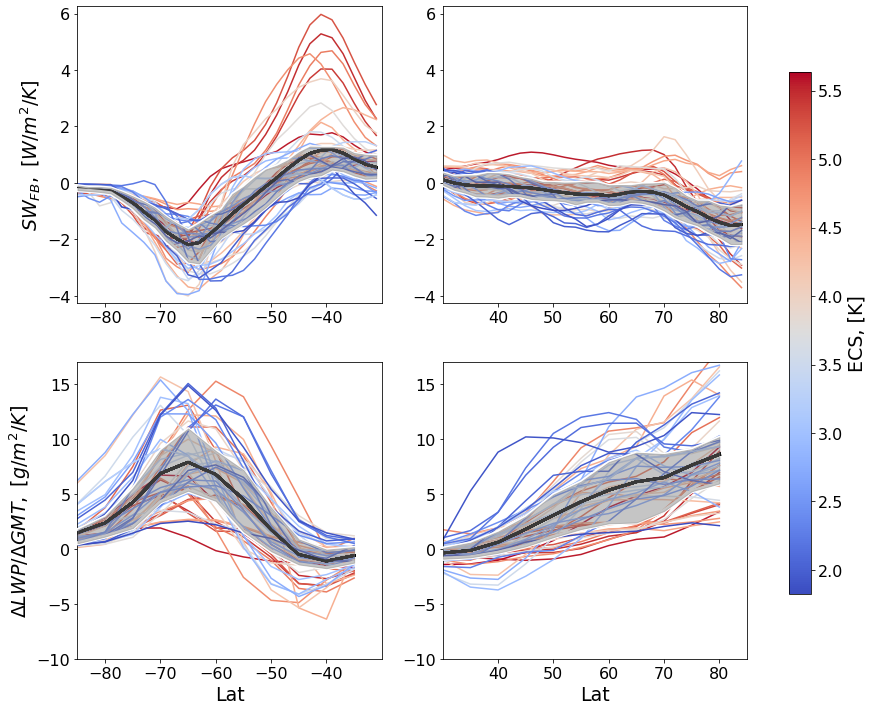

In [32]:
# Plotting: Extratropical latitudinal distribution of SW_FB and DeltaLWP/ DeltaGMT..

parameters = {'axes.labelsize': 19, 'legend.fontsize': 23,
         'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}

plt.rcParams.update(parameters)
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# ax[0,0].minorticks_on()
# ax[0,0].tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
# ax[0,0].tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

# ax[0,1].minorticks_on()
# ax[0,1].tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
# ax[0,1].tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

# ax[1,0].minorticks_on()
# ax[1,0].tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
# ax[1,0].tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

# ax[1,1].minorticks_on()
# ax[1,1].tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
# ax[1,1].tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)


p50_MM_SW = np.full((SWCLD_withoutNaN.shape[1], 2), 0.00)
p95_MM_SW = np.full((SWCLD_withoutNaN.shape[1], 2), 0.00)

# print(lat_mz)
lat_range1 = [-85., -30.] 
lat_range2 = [ 30.,  85.]
ind1_SW = (lat_mz <=max(lat_range1)) & (lat_mz >= min(lat_range1))
ind2_SW = (lat_mz <=max(lat_range2)) & (lat_mz >= min(lat_range2))

lonmean_MLAT_swcld = np.nanmean(SWCLD_withoutNaN, axis = (2))

for i in range(SWCLD_withoutNaN.shape[1]):
    p50_MM_SW[i, 0] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 25.)
    p95_MM_SW[i, 0] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 0.)
    p50_MM_SW[i, 1] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 75.)
    p95_MM_SW[i, 1] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 100.)
mean_LAT_swcld = np.nanmean(SWCLD_withoutNaN, axis = (0, 2))

ECS = []
for i in range(len(deck3_nas)):
    ECS.append(EffCS[deck3_nas[i]])
ECS = np.asarray(ECS)

sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])
ordinal_EffCS_index = [sorted_EffCS_index.index(i) for i in range(50)]
# print(sorted_EffCS_index)
# print(ordinal_EffCS_index)

# Colors:
coolwarm_colormap = matplotlib.cm.get_cmap("coolwarm")
COLORS = [coolwarm_colormap(x) for x in np.linspace(0.00, 1.00, num=50)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
print(COLORS)

# print(COLORS)

for i in range(len(deck3_nas)):

    ss = SWCLD_withoutNaN[i, :,:]
    xx = np.nanmean(ss, axis = 1)
    # Remove the NaN value in 1-D vector:
    ind_truevector = isnan(xx)==False

    ind1_SW_true = np.logical_and(ind1_SW, ind_truevector)
    ind2_SW_true = np.logical_and(ind2_SW, ind_truevector)
    # print(arange(min(lat_range1), max(lat_range1), 2.))
    ax[0,0].plot(arange(min(lat_range1), max(lat_range1), 2.), xx[ind1_SW_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax[0,0].plot(arange(min(lat_range1), max(lat_range1), 2.), mean_LAT_swcld[ind1_SW_true], linewidth = 2.6, c = 'k', linestyle = '-')

    ax[0,1].plot(arange(min(lat_range2), max(lat_range2), 2.), xx[ind2_SW_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax[0,1].plot(arange(min(lat_range2), max(lat_range2), 2.), mean_LAT_swcld[ind2_SW_true], linewidth = 2.6, c = 'k', linestyle = '-')

# Shading:

ax[0,0].plot(np.arange(min(lat_range1), max(lat_range1), 2.), p50_MM_SW[:, 0][ind1_SW_true], linestyle = '-', c= 'white', linewidth = 4.2, zorder = 97)
ax[0,0].plot(np.arange(min(lat_range1), max(lat_range1), 2.), p50_MM_SW[:, 1][ind1_SW_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
ax[0,0].fill_between(np.arange(min(lat_range1), max(lat_range1), 2.), p50_MM_SW[:, 0][ind1_SW_true], p50_MM_SW[:, 1][ind1_SW_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax[0,0].fill_between(np.arange(min(lat_range1), max(lat_range1), 2.), p95_MM_SW[:, 0][ind1_SW_true], p95_MM_SW[:, 1][ind1_SW_true], color = 'gray', alpha = 0.30, zorder = 99)

ax[0,1].plot(np.arange(min(lat_range2), max(lat_range2), 2.), p50_MM_SW[:, 0][ind2_SW_true], linestyle = '-', c= 'white', linewidth = 4.2, zorder = 97)
ax[0,1].plot(np.arange(min(lat_range2), max(lat_range2), 2.), p50_MM_SW[:, 1][ind2_SW_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
ax[0,1].fill_between(np.arange(min(lat_range2), max(lat_range2), 2.), p50_MM_SW[:, 0][ind2_SW_true], p50_MM_SW[:, 1][ind2_SW_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax[0,1].fill_between(np.arange(min(lat_range2), max(lat_range2), 2.), p95_MM_SW[:, 0][ind2_SW_true], p95_MM_SW[:, 1][ind2_SW_true], color = 'gray', alpha = 0.30, zorder = 99)

# Plot setting:
ax[0,0].set_xlim(-85., -30.)
ax[0,0].set_xticks(np.arange(-80., -30., 10))
ax[0,0].set_ylim(-4.25, 6.25)

ax[0,1].set_xlim(30., 85.)
ax[0,1].set_xticks(np.arange(40., 85., 10))
ax[0,1].set_ylim(-4.25, 6.25)

# ax[0,0].set_xlabel("Lat")
ax[0,0].set_ylabel(r"$SW_{FB},\ [W/m^{2}/K] $")

# ax[0,1].set_xlabel("Lat")
# ax[0,1].set_ylabel(r"$SW\ Cloud\ Feedback,\ [W/m^{2}/K] $")

###################:
p50_MM_DlwpDgmt = np.full((len(s_range), 2), 0.00)
p95_MM_DlwpDgmt = np.full((len(s_range), 2), 0.00)

# print(lat_mz)
lat_range1 = [-85., -30.] 
lat_range2 = [ 30.,  85.]
ind1_Dlwp_Dgmt = (s_range <=max(lat_range1)) & (s_range >= min(lat_range1))
ind2_Dlwp_Dgmt = (s_range <=max(lat_range2)) & (s_range >= min(lat_range2))
print(ind1_Dlwp_Dgmt, ind2_Dlwp_Dgmt)

lonmean_MLAT_DlwpDgmt = np.nanmean(1000. * delta_LWP_dTg_ALL_5X5, axis = (2))

for i in range(len(s_range)):

    p50_MM_DlwpDgmt[i, 0] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 25.)
    p95_MM_DlwpDgmt[i, 0] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 2.5)
    p50_MM_DlwpDgmt[i, 1] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 75.)
    p95_MM_DlwpDgmt[i, 1] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 97.5)
mean_LAT_DlwpDgmt = np.nanmean(1000. * delta_LWP_dTg_ALL_5X5, axis = (0, 2))


for i in range(len(deck3_nas)):

    ss = 1000 * delta_LWP_dTg_ALL_5X5[i, :,:]
    xx = np.nanmean(ss, axis = 1)
    # Remove the NaN value in 1-D vector:
    ind_truevector = np.isnan(xx)==False

    ind1_Dlwp_Dgmt_true = np.logical_and(ind1_Dlwp_Dgmt, ind_truevector)
    ind2_Dlwp_Dgmt_true = np.logical_and(ind2_Dlwp_Dgmt, ind_truevector)
    # print(np.arange(min(lat_range1), max(lat_range1), 2.))
    ax[1,0].plot(np.arange(min(lat_range1), max(lat_range1), 5.), xx[ind1_Dlwp_Dgmt_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax[1,0].plot(np.arange(min(lat_range1), max(lat_range1), 5.), mean_LAT_DlwpDgmt[ind1_Dlwp_Dgmt_true], linewidth = 2.6, c = 'k', linestyle = '-')

    handle = ax[1,1].plot(np.arange(min(lat_range2), max(lat_range2), 5.), xx[ind2_Dlwp_Dgmt_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax[1,1].plot(np.arange(min(lat_range2), max(lat_range2), 5.), mean_LAT_DlwpDgmt[ind2_Dlwp_Dgmt_true], linewidth = 2.6, c = 'k', linestyle = '-')
    

# Shading: 

ax[1,0].plot(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM_DlwpDgmt[:, 0][ind1_Dlwp_Dgmt_true], linestyle = '-', c= 'white', linewidth = 4.2, zorder = 97)
ax[1,0].plot(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM_DlwpDgmt[:, 1][ind1_Dlwp_Dgmt_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
ax[1,0].fill_between(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM_DlwpDgmt[:, 0][ind1_Dlwp_Dgmt_true], p50_MM_DlwpDgmt[:, 1][ind1_Dlwp_Dgmt_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax[1,0].fill_between(np.arange(min(lat_range1), max(lat_range1), 5.), p95_MM_DlwpDgmt[:, 0][ind1_Dlwp_Dgmt_true], p95_MM_DlwpDgmt[:, 1][ind1_Dlwp_Dgmt_true], color = 'gray', alpha = 0.35, zorder = 99)

ax[1,1].plot(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM_DlwpDgmt[:, 0][ind2_Dlwp_Dgmt_true], linestyle = '-', c= 'white', linewidth = 4.2, zorder = 97)
ax[1,1].plot(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM_DlwpDgmt[:, 1][ind2_Dlwp_Dgmt_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
ax[1,1].fill_between(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM_DlwpDgmt[:, 0][ind2_Dlwp_Dgmt_true], p50_MM_DlwpDgmt[:, 1][ind2_Dlwp_Dgmt_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax[1,1].fill_between(np.arange(min(lat_range2), max(lat_range2), 5.), p95_MM_DlwpDgmt[:, 0][ind2_Dlwp_Dgmt_true], p95_MM_DlwpDgmt[:, 1][ind2_Dlwp_Dgmt_true], color = 'gray', alpha = 0.35, zorder = 99)

# Plot setting:
ax[1,0].set_xlim(-85., -30.)
ax[1,0].set_xticks(arange(-80., -30., 10.))
ax[1,0].set_ylim(-10.0, 17.0)

ax[1,1].set_xlim(30., 85.)
ax[1,1].set_xticks(arange(40., 85., 10.))
ax[1,1].set_ylim(-10.0, 17.0)

ax[1,0].set_xlabel("Lat")
ax[1,0].set_ylabel(r"$\Delta LWP / \Delta GMT,\ [g/m^{2}/K] $")

ax[1,1].set_xlabel("Lat")
# ax[1,1].set_ylabel(r"$\Delta LWP / \Delta GMT,\ [kg/m^{2}/K] $")

cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin = min(ECS), vmax = max(ECS)), cmap=coolwarm_colormap), ax=ax, shrink = 0.8, label = 'ECS, [K]', aspect = 24)

# plt.savefig(path_plot +"Fig_1_(a).jpg", bbox_inches = 'tight', dpi = 500)

# plt.show()

#### sort the GCMs according to Effective climate sensitivity: 

In [8]:
ECS = []
for i in range(len(deck3_nas)):
    ECS.append(EffCS[deck3_nas[i]])
ECS = np.asarray(ECS)

In [9]:
# print(ECS.shape)
print(ECS)
sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])

print(sorted_EffCS_index[::-1])

[5.63890308 5.30658977 5.16462663 5.1479152  4.90365062 4.79855539
 4.79409612 4.76444711 4.69916088 4.68428568 4.64556708 4.35549011
 4.33121301 4.32707288 4.260067   4.18348546 4.13343153 4.08577933
 4.03945763 3.95176282 3.89012524 3.72287893 3.70181357 3.62807204
 3.55334811 3.44780922 3.36874904 3.25472004 3.25181288 3.16050685
 3.1299513  3.11734108 3.02544019 2.94046748 2.87103759 2.87032985
 2.81772765 2.71491592 2.71040476 2.66052644 2.60951317 2.60179097
 2.48677158 2.44005218 2.42665561 2.42638864 3.11734108 2.29041175
 2.11943442 1.82713996]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 46, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49]


In [10]:
print(sorted_EffCS_index.index(28))

21


In [11]:
print(ECS[sorted_EffCS_index[::-1]])

[5.63890308 5.30658977 5.16462663 5.1479152  4.90365062 4.79855539
 4.79409612 4.76444711 4.69916088 4.68428568 4.64556708 4.35549011
 4.33121301 4.32707288 4.260067   4.18348546 4.13343153 4.08577933
 4.03945763 3.95176282 3.89012524 3.72287893 3.70181357 3.62807204
 3.55334811 3.44780922 3.36874904 3.25472004 3.25181288 3.16050685
 3.1299513  3.11734108 3.11734108 3.02544019 2.94046748 2.87103759
 2.87032985 2.81772765 2.71491592 2.71040476 2.66052644 2.60951317
 2.60179097 2.48677158 2.44005218 2.42665561 2.42638864 2.29041175
 2.11943442 1.82713996]


In [12]:
Current_model_nas = []

for i in range(len(deck3)):
    for j in range(reshape_sw_cld_fb.shape[0]):

        if (deck3[i]['modn'] == model_nas[j]):
            Current_model_nas.append(deck3[i]['modn'])
Current_model_nas = np.asarray(Current_model_nas)
print(Current_model_nas)

['CanESM5' 'E3SM-1-0' 'CESM2-FV2' 'CESM2' 'CNRM-CM6-1' 'CESM2-WACCM-FV2'
 'CNRM-ESM2-1' 'NESM3' 'IPSL-CM6A-LR' 'CESM2-WACCM' 'MIROC-ESM' 'TaiESM1'
 'EC-Earth3-Veg' 'CNRM-CM6-1-HR' 'EC-Earth3' 'FGOALS-s2' 'IPSL-CM5A-LR'
 'CSIRO-Mk3-6-0' 'BNU-ESM' 'GFDL-CM3' 'GFDL-CM4' 'SAM0-UNICON' 'CanESM2'
 'MPI-ESM-LR' 'CMCC-CM2-SR5' 'MPI-ESM-MR' 'FGOALS-g2' 'BCC-ESM1'
 'CNRM-CM5' 'AWI-CM-1-1-MR' 'MRI-ESM2-0' 'GISS-E2-1-H' 'MPI-ESM1-2-LR'
 'CCSM4' 'NorESM1-M' 'FGOALS-g3' 'bcc-csm1-1' 'MIROC5' 'GISS-E2-1-G'
 'MIROC-ES2L' 'MRI-CGCM3' 'MIROC6' 'NorESM2-MM' 'GFDL-ESM2M' 'GFDL-ESM2G'
 'GISS-E2-2-G' 'GISS-E2-1-H' 'CAMS-CSM1-0' 'GISS-E2-R' 'INM-CM4-8']


In [13]:
print(Current_model_nas[sorted_EffCS_index[::-1]])

['CanESM5' 'E3SM-1-0' 'CESM2-FV2' 'CESM2' 'CNRM-CM6-1' 'CESM2-WACCM-FV2'
 'CNRM-ESM2-1' 'NESM3' 'IPSL-CM6A-LR' 'CESM2-WACCM' 'MIROC-ESM' 'TaiESM1'
 'EC-Earth3-Veg' 'CNRM-CM6-1-HR' 'EC-Earth3' 'FGOALS-s2' 'IPSL-CM5A-LR'
 'CSIRO-Mk3-6-0' 'BNU-ESM' 'GFDL-CM3' 'GFDL-CM4' 'SAM0-UNICON' 'CanESM2'
 'MPI-ESM-LR' 'CMCC-CM2-SR5' 'MPI-ESM-MR' 'FGOALS-g2' 'BCC-ESM1'
 'CNRM-CM5' 'AWI-CM-1-1-MR' 'MRI-ESM2-0' 'GISS-E2-1-H' 'GISS-E2-1-H'
 'MPI-ESM1-2-LR' 'CCSM4' 'NorESM1-M' 'FGOALS-g3' 'bcc-csm1-1' 'MIROC5'
 'GISS-E2-1-G' 'MIROC-ES2L' 'MRI-CGCM3' 'MIROC6' 'NorESM2-MM' 'GFDL-ESM2M'
 'GFDL-ESM2G' 'GISS-E2-2-G' 'CAMS-CSM1-0' 'GISS-E2-R' 'INM-CM4-8']


In [14]:
print(SW_FB_4085[sorted_EffCS_index[::-1]])

[-0.7338598   0.57005512  1.21259446  0.66571835 -0.37128178  1.52770246
 -0.31042399 -0.67519632 -0.48137357  0.76889119 -1.25014399  1.10238329
 -0.33767653 -0.3963994  -0.23915645 -1.03569614 -0.34825546 -1.03899643
 -0.28330926 -0.07059348 -0.30823915  0.57282465 -0.94813628 -1.49109229
  0.23299922 -1.56804822 -0.46449433 -0.37056604 -1.07141221 -0.95840175
 -0.6858539  -0.23981515 -0.23981515 -1.47836139 -0.15410108 -0.04742896
 -0.81323349 -0.66276868 -0.92571557 -0.60610591 -0.86082588 -0.4590894
 -1.02865439 -0.68003979 -1.5174983  -1.46031041 -0.48081179 -1.22398444
 -0.59894597 -1.05858408]


#### Subplot (b):
Response of SO (40 - 85^{o}S) averaged LWP to GMT change in the first 150 yrs of abrupt4xCO_{2} simulations for 50 GCMs:

In [15]:
# define the curve function which you intend to fit:
def target_func_poly1(x, a, b):
    '''
    linear fit
    '''
    y = a* x + b
    return y

def target_func_poly2(x, a, b, c): 
    '''
    2d polynomial fit
    '''
    y = a* x**2 + b* x**1 + c
    return y

def target_func_expo(x, a, b, c):

    '''
    exponential fitting
    '''
    y = a * b**x + c
    
    return y


[-82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5]


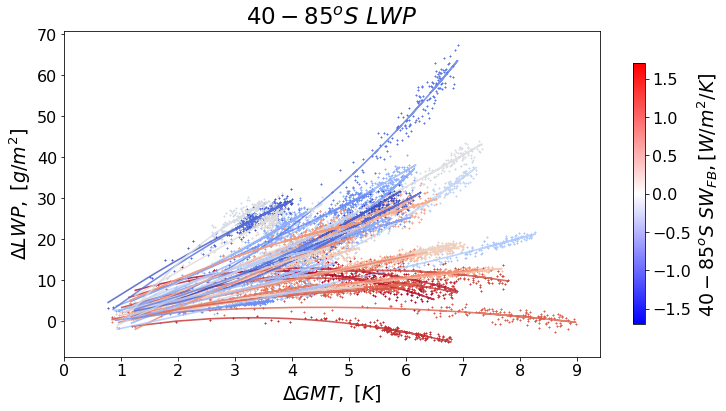

In [25]:
# Plotting Figure S1: Annual time series of GCMs’ LWP averaged over 40 — 85S vs. GMT averaged over globe:

# Calc the 40--85^{o} S averaged annual changes in LWP; globally averaged annual changes in GMT; colored by model ECS

an_delta_LWP_raw = full((len(deck3_nas), 150), 0.0)  # annual time series of 40 -- 85 averaged changes in LWP for GCMs;
an_delta_GMT = full((len(deck3_nas), 150), 0.0)  # annual time series of globally changes in GMT for GCMs;

for i in range(len(deck3_nas)):
    lat_range1 = [-85., -40.] 
    ind1 = (output_dict0_abr[deck3_nas[i]][()]['lat'] <=max(lat_range1)) & (output_dict0_abr[deck3_nas[i]][()]['lat'] >= min(lat_range1))

    an_delta_LWP_raw[i,:] = (area_mean(get_annual_metric(output_dict0_abr[deck3_nas[i]][()]['LWP'][:, ind1,:], output_dict0_abr[deck3_nas[i]][()]['times'], label = 'mon'), output_dict0_abr[deck3_nas[i]][()]['lat'][ind1], output_dict0_abr[deck3_nas[i]][()]['lon'])[0:150]
                               - np.nanmean(area_mean(get_annual_metric(output_dict0_PI[deck3_nas[i]][()]['LWP'][:, ind1,:], output_dict0_PI[deck3_nas[i]][()]['times']), output_dict0_PI[deck3_nas[i]][()]['lat'][ind1], output_dict0_PI[deck3_nas[i]][()]['lon'])))

    an_delta_GMT[i,:] = (area_mean(get_annual_metric(output_dict0_abr[deck3_nas[i]][()]['gmt'], output_dict0_abr[deck3_nas[i]][()]['times'], label = 'mon'), output_dict0_abr[deck3_nas[i]][()]['lat'], output_dict0_abr[deck3_nas[i]][()]['lon'])[0:150]
                           - np.nanmean(area_mean(get_annual_metric(output_dict0_PI[deck3_nas[i]][()]['gmt'], output_dict0_PI[deck3_nas[i]][()]['times']), output_dict0_PI[deck3_nas[i]][()]['lat'], output_dict0_PI[deck3_nas[i]][()]['lon'])))

# print(an_delta_GMT)
# print(an_delta_LWP_raw)

# Plotting:

import matplotlib
parameters = {'axes.labelsize': 19, 'legend.fontsize': 16,
         'axes.titlesize': 23, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)

fig2, ax2 = plt.subplots(1, 1, figsize=(12, 6))
print(s_range[1:10])

# DLWP_Dgmt = area_mean(delta_LWP_dTg_ALL_5X5[:, 1:10, :], s_range[1:10], x_range)
# # print(DLWP_Dgmt)
# DLWP_Dgmt = np.asarray(DLWP_Dgmt)
# sorted_DLWP_Dgmt_index = sorted(range(50), key = lambda index:DLWP_Dgmt[index])
# ordinal_DLWP_Dgmt_index = [sorted_DLWP_Dgmt_index.index(i) for i in range(50)]

# Colored by model ECS:

SWFB_SO = []
for i in range(len(deck3_nas)):
    SWFB_SO.append(SW_FB_4085[i])  # SWCLD[deck3_nas[i]]
SWFB_SO = np.asarray(SWFB_SO)

sorted_SWCLD_index = sorted(range(50), key = lambda index:SWFB_SO[index])
ordinal_SWCLD_index = [sorted_SWCLD_index.index(i) for i in range(50)]

# Colors:
coolwarm_colormap = matplotlib.cm.get_cmap("coolwarm")
bwr_colormap = matplotlib.cm.get_cmap("bwr")
COLORS = [coolwarm_colormap(x) for x in np.linspace(0.00, 1.00, num=50)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
# 

for i in range(len(deck3)):
    x = an_delta_GMT[i]
    y = 1000.* an_delta_LWP_raw[i]
    C = ordinal_SWCLD_index[i]
    ax2.scatter(x, y, c = COLORS[C], marker = 'x', s= 1)
    
    POPT_gmtLWP, POCV_gmtLWP = curve_fit(target_func_poly2, x, y)
    # print(POPT_gmtLWP)
    ax2.plot(x, POPT_gmtLWP[0] * x**2 + POPT_gmtLWP[1] * x**1 + POPT_gmtLWP[2], color = COLORS[C], linewidth = 1.6, linestyle = '-', alpha = 0.8, zorder = 99)
    
    # if i==18:
    #     # BUN-ESM:
    #     ax2.plot(x, POPT_gmtLWP[0] * x**2 + POPT_gmtLWP[1] * x**1 + POPT_gmtLWP[2], color = 'k', linewidth = 3, linestyle = '-', alpha = 0.8, zorder = 99)

# Plot setting:

ax2.set_xlim(0., 9.4)
ax2.set_xticks(arange(0, 10, 1))

# ax2.set_ylim(-0.012, 0.07)
# ax2.set_yticks(arange(-0.01, 0.08, 0.01))

ax2.set_xlabel(r"$ \Delta GMT, \ [K]$")
ax2.set_ylabel(r"$ \Delta LWP, \ [g/m^{2}]$")

ax2.set_title(r"$ 40 - 85^{o} S\ LWP$", )
cbar = fig2.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin = -1.7, vmax = 1.7), cmap = bwr_colormap), ax = ax2, 
                     shrink = 0.8, label = r'$ 40 - 85^{o} S\ SW_{FB}, [W/m^{2}/K]$', aspect = 22)  # Global\ mean\

# plt.savefig(path_plot +"Fig_1_(B)_2.jpg", bbox_inches = 'tight', dpi = 500)

# plt.show()